컴퓨터공학과 2232036005 이재홍

Homework #2
- 4.7 Exercises(연습문제) Problem 1(1번) 풀이
- 5.7 Exercises(연습문제) Problem 1(1번) 풀이
- 6.5 Exercises(연습문제) Problem 2(2번) 풀이
- 위 3개 문제의 풀이를 jupyter notebook으로 구성하여 URL 제출 (notebook viewer 주소 변환 필수)

# 1. Take several pictures of red, blue, and green items with your phone or other digital camera (or download some from the internet, if a camera isn’t available).

a. Load each image, and convert it to a tensor.

b. For each image tensor, use the .mean() method to get a sense of how bright
the image is.

c. Take the mean of each channel of your images. Can you identify the red,
green, and blue items from only the channel averages?

In [73]:
"""a. Load each image, and convert it to a tensor."""
import torch
import imageio
import os

img_list = [imageio.imread("/content/img/"+img_name) for img_name in os.listdir("/content/img/") if "jpg" in img_name] #폴더 내부에 있는 이미지 전부 읽어오기

img_tensor_list = [torch.tensor(img).permute(2,0,1).float() for img in img_list] #읽어온 이미지를 torch.tensor화 하기. permute와 float화도 동시에 수행
img_tensor_list  #출력

<ipython-input-73-3df0f9eb5e90>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_list = [imageio.imread("/content/img/"+img_name) for img_name in os.listdir("/content/img/") if "jpg" in img_name] #폴더 내부에 있는 이미지 전부 읽어오기


[tensor([[[ 80.,  80.,  80.,  ...,  99.,  95.,  91.],
          [ 80.,  79.,  78.,  ...,  99.,  97.,  95.],
          [ 81.,  79.,  77.,  ...,  98.,  99., 100.],
          ...,
          [ 91.,  91.,  91.,  ...,  75.,  75.,  75.],
          [ 90.,  90.,  90.,  ...,  74.,  75.,  75.],
          [ 89.,  90.,  91.,  ...,  74.,  74.,  75.]],
 
         [[ 72.,  72.,  72.,  ...,  90.,  86.,  82.],
          [ 72.,  71.,  70.,  ...,  90.,  88.,  86.],
          [ 73.,  71.,  69.,  ...,  89.,  90.,  91.],
          ...,
          [ 90.,  90.,  90.,  ...,  74.,  74.,  74.],
          [ 89.,  89.,  89.,  ...,  73.,  74.,  74.],
          [ 88.,  89.,  90.,  ...,  73.,  73.,  74.]],
 
         [[ 61.,  61.,  61.,  ...,  81.,  77.,  73.],
          [ 61.,  60.,  59.,  ...,  81.,  79.,  77.],
          [ 62.,  60.,  58.,  ...,  80.,  81.,  82.],
          ...,
          [ 86.,  86.,  86.,  ...,  69.,  69.,  69.],
          [ 85.,  85.,  85.,  ...,  68.,  69.,  69.],
          [ 84.,  85.,  86.,  .

In [74]:
"""b. For each image tensor, use the .mean() method to get a sense of how bright the image is."""

img_tesor_mean_forB = [img_tensor.mean() for img_tensor in img_tensor_list] #각 텐서별로 mean()연산 수행

img_tesor_mean_forB # 출력

[tensor(91.7195), tensor(124.7812), tensor(80.1354), tensor(81.5760)]

In [75]:
"""c. Take the mean of each channel of your images. Can you identify the red, green, and blue items from only the channel averages?"""

img_tensor_mean_forC = [img_tensor.reshape(3,-1).mean(1) for img_tensor in img_tensor_list] #텐서별 (3, H*W) 형태로 차원을 변경한 후 차원 1에대해서 mean 연산 수행 

img_tensor_mean_forC

[tensor([102.8101,  93.9396,  78.4088]),
 tensor([139.4863, 126.4954, 108.3617]),
 tensor([ 69.9933,  53.0646, 117.3482]),
 tensor([90.9767, 83.4962, 70.2550])]

# 2. Redefine the model to be w2 * t_u ** 2 + w1 * t_u + b.
a. What parts of the training loop, and so on, need to change to accommodate
this redefinition?

b. What parts are agnostic to swapping out the model?

c. Is the resulting loss higher or lower after training?

d. Is the actual result better or worse?

In [76]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_un = 0.1 * t_u

def model(t_u, w, b):
    return w * t_u + b

def model2(t_u, w1, w2, b):
    return w2 * t_u **2 + w1 *t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
   
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

def training_loop2(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
   
        t_p = model2(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

# training_loop(
#     n_epochs = 5000, 
#     learning_rate = 1e-2, 
#     params = torch.tensor([1.0, 0.0], requires_grad=True), # <1> 
#     t_u = t_un, # <2> 
#     t_c = t_c)

training_loop2(
    n_epochs = 20000, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)

Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123477
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845285
Epoch 3500, Loss 4.465788
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744
Epoch 5500, Loss 3.761724
Epoch 6000, Loss 3.689469
Epoch 6500, Loss 3.636971
Epoch 7000, Loss 3.598528
Epoch 7500, Loss 3.570086
Epoch 8000, Loss 3.548757
Epoch 8500, Loss 3.532496
Epoch 9000, Loss 3.519839
Epoch 9500, Loss 3.509750
Epoch 10000, Loss 3.501493
Epoch 10500, Loss 3.494538
Epoch 11000, Loss 3.488512
Epoch 11500, Loss 3.483152
Epoch 12000, Loss 3.478269
Epoch 12500, Loss 3.473727
Epoch 13000, Loss 3.469430
Epoch 13500, Loss 3.465311
Epoch 14000, Loss 3.461321
Epoch 14500, Loss 3.457426
Epoch 15000, Loss 3.453600
Epoch 15500, Loss 3.449829
Epoch 16000, Loss 3.446097
Epoch 16500, Loss 3.442396
Epoch 17000, Loss 3.438722
Epoch 17500, Loss 3.435068
Epoch 18000, Loss 3.431431
Epoch 18500, Loss 3.427811
Epoch 19000, Loss 3.

tensor([-1.1422,  0.6107, -1.4167], requires_grad=True)

# a. What parts of the training loop, and so on, need to change to accommodate this redefinition?
## A. 모델의 함수, 입력파라미터의 갯수를 조절하고 learning_rate를 작게 해주어야했다.

# b. What parts are agnostic to swapping out the model?
## A. 입력 파라미터의 수와 learning rate를 알맞게 조절해주어야한다.

# c. Is the resulting loss higher or lower after training?
## A. Loss가 더 높게 나온다.

# d. Is the actual result better or worse?
## A. 성능이 더 안좋게 나온다.

# 3. The third-hardest problem in physics is finding a proper wine to celebrate dis-coveries. Load the wine data from chapter 4, and create a new model with the appropriate number of input parameters.
a. How long does it take to train compared to the temperature data we have
been using?

b. Can you explain what factors contribute to the training times?

c. Can you get the loss to decrease while training on this dataset?

d. How would you go about graphing this dataset?

Epoch 1, Training loss 166.3210, Validation loss 280.4617
Epoch 1000, Training loss 60.3316, Validation loss 58.0635
Epoch 2000, Training loss 44.2969, Validation loss 39.4749
Epoch 3000, Training loss 28.7082, Validation loss 25.9960
Epoch 4000, Training loss 16.8624, Validation loss 15.7446
Epoch 5000, Training loss 10.4799, Validation loss 9.8574


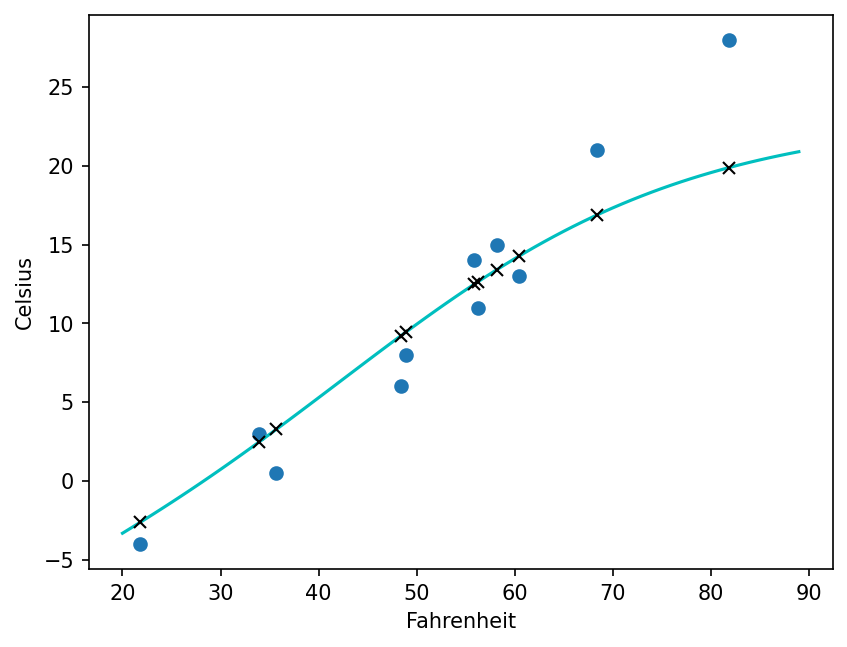

In [77]:
import csv
import numpy as np
import torch.optim as optim
import torch.nn as nn
from collections import OrderedDict

#data load
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val


#set model
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

In [78]:
import csv
import numpy as np
import torch.optim as optim
import torch.nn as nn

# load data
wine_path = "winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";",
                         skiprows=1) # load csv except first row (fixed acidity	volatile acidity..)
wineq_numpy
col_list = next(csv.reader(open(wine_path), delimiter=';')) #load first row

wineq = torch.from_numpy(wineq_numpy) #converts to torch tensor from numpy
data = wineq[:, :-1] # <1> excepts last column
target = wineq[:, -1] # <2> last column
target = wineq[:, -1] # to integer type(long)
target_unsqueezed = target.unsqueeze(1)

print(data.shape)
print(target_unsqueezed.shape)

n_wine_samples = data.shape[0]
n_val = int(n_wine_samples *0.2)

shuffled_indices = torch.randperm(n_wine_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

wine_ch_train = data[train_indices]
wine_tar_train = target_unsqueezed[train_indices]

wine_ch_val = data[val_indices]
wine_tar_val = target_unsqueezed[val_indices]


#set model
seq_model2 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(data.shape[1], neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))


optimizer2 = optim.SGD(seq_model2.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer2,
    model = seq_model2,
    loss_fn = nn.MSELoss(),
    t_u_train = wine_ch_train,
    t_u_val = wine_ch_val, 
    t_c_train = wine_tar_train,
    t_c_val = wine_tar_val)


torch.Size([4898, 11])
torch.Size([4898, 1])
Epoch 1, Training loss 36.4379, Validation loss 36.4641
Epoch 1000, Training loss 0.7751, Validation loss 0.8297
Epoch 2000, Training loss 0.7474, Validation loss 0.7986
Epoch 3000, Training loss 0.7461, Validation loss 0.7988
Epoch 4000, Training loss 0.7426, Validation loss 0.7935
Epoch 5000, Training loss 0.7418, Validation loss 0.7938


# a. How long does it take to train compared to the temperature data we have been using?
## A. 온도 데이터에 비해 데이터의 수가 많으므로 더 느리다
# b. Can you explain what factors contribute to the training times?
## A. 입력 데이터의 수가 11개로 weight 노드가 더 많아지므로 forward 및 backward시 연산 횟수가 증가하여 훈련시간이 증가한다.
# c. Can you get the loss to decrease while training on this dataset?
## A. Loss가 감소하는 것을 확인하였다.
# d. How would you go about graphing this dataset?
## A. 11채널에 대해 데이터셋을 하나의 그래프로 그리는 것은 매우 어려운일이다. 각 입력 채널별 그래프화 하여 그래프 11개를 출력하는 방법을 고안해볼수 있을 것이다.